## Linear multistep method

Consider the solution of

$$u'=-u,\quad u(0)=1$$.

### AB2 method

Second order scheme:

$$u_{n+2}=u_{n+1}+\Delta t (1.5 f_{n+1}-0.5 f_{n})$$

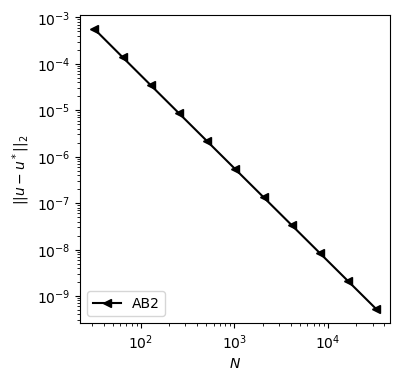

Slope for AB2 = 2.0026294930476514


In [3]:
using LinearAlgebra

function ab2(N,T,u0)
    u = zeros(1,N+1)
    dt = T/N
    # Use a trapezoidal rule to start
    u[:,1] .= u0
    u[:,2] .= (1.0-0.5*dt)/(1.0+0.5*dt)*u[:,1]
    fu = zeros(1,N+1)
    fu[:,1] .= -u[:,1]
    fu[:,2] .= -u[:,2]
    for i = 2 : N
        u[:,i+1] .= u[:,i] + dt * (1.5*fu[:,i] - 0.5*fu[:,i-1])
        fu[:,i+1] .= -u[:,i+1]
    end
    return u
end

T  = 3.0
u0 = 1.0
NList = 2 .^(5:15)
uexact = exp(-T)
errAB2List = zeros(size(NList))
for i = 1 : length(NList)
    N = NList[i]
    uAB2 = ab2(N,T,u0)
    errAB2List[i] = norm(uAB2[1,end]-uexact)
end

using PyPlot
figure(1,figsize=(4,4))
loglog(NList, abs.(errAB2List), "k-<", label="AB2")
axis("tight")
xlabel(L"N")
ylabel(L"||u-u^*||_2")
legend(loc="lower left")

slopeAB2 = -(log(errAB2List[end])-log(errAB2List[1])) / 
(log(NList[end]) - log(NList[1]))

println("Slope for AB2 = ", slopeAB2 )


### An unstable method

Second order implicit scheme:

$$u_{n+2}-3u_{n+1}+2u_n=\Delta t \left(\frac{13}{12} f_{n+2}-\frac{5}{3} f_{n+1}-\frac{5}{12} f_n\right).$$

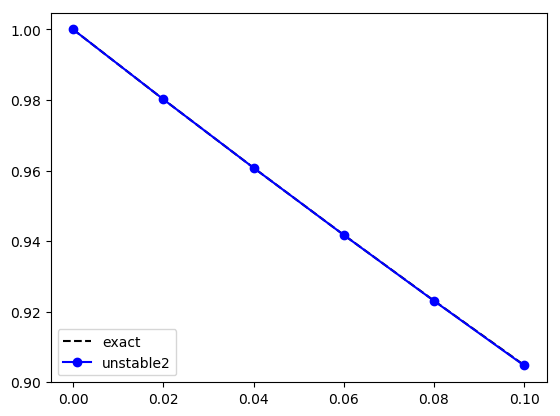

PyObject <matplotlib.legend.Legend object at 0x000000003342FD30>

In [5]:
function unstable2(N,T,u0)
    u = zeros(1,N+1)
    dt = T/N
    u[:,1] .= u0
    # Use a trapezoidal rule to start
    u[:,2] .= (1.0-0.5*dt)/(1.0+0.5*dt)*u[:,1]
    fu = zeros(1,N+1)
    fu[:,1] .= -u[:,1]
    fu[:,2] .= -u[:,2]
    for i = 2 : N
        u[:,i+1] .= 1.0/(1.0+13.0/12.0*dt)*(3.0*u[:,i] - 2.0*u[:,i-1] + 
            dt * (-5.0/3.0*fu[:,i] - 5.0/12.0*fu[:,i-1]))
        fu[:,i+1] .= -u[:,i+1]
    end
    return u
end

T  = 0.1
u0 = 1.0
N = 5
uexact = exp(-T)
uUnstable2 = unstable2(N,T,u0)
TList=range(0,stop=T,length=N+1)
plot(TList,exp.(-TList),"k--",label="exact")
plot(TList,vec(uUnstable2),"b-o",label="unstable2")
legend(loc="lower left")


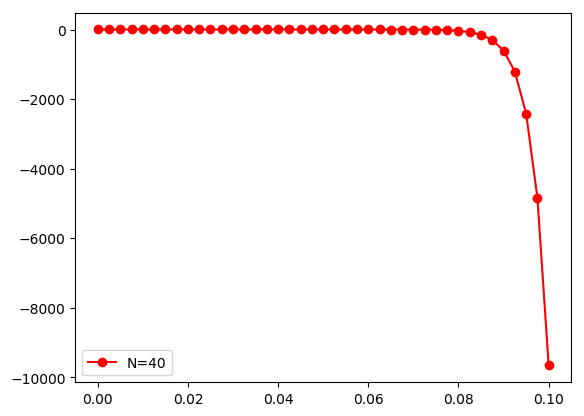

PyObject <matplotlib.legend.Legend object at 0x0000000000F47630>

In [8]:
N = 40
uexact = exp(-T)
uUnstable2 = unstable2(N,T,u0)
TList=range(0,stop=T,length=N+1)
plot(TList,vec(uUnstable2),"r-o",label="N=40")
legend(loc="lower left")